损失数据已成功加载。


Failed to find a Ghostscript installation.  Distillation step skipped.


验证损失图已保存到 D:/PycharmProjects/保存的参数/指纹参数/Fig8a.eps


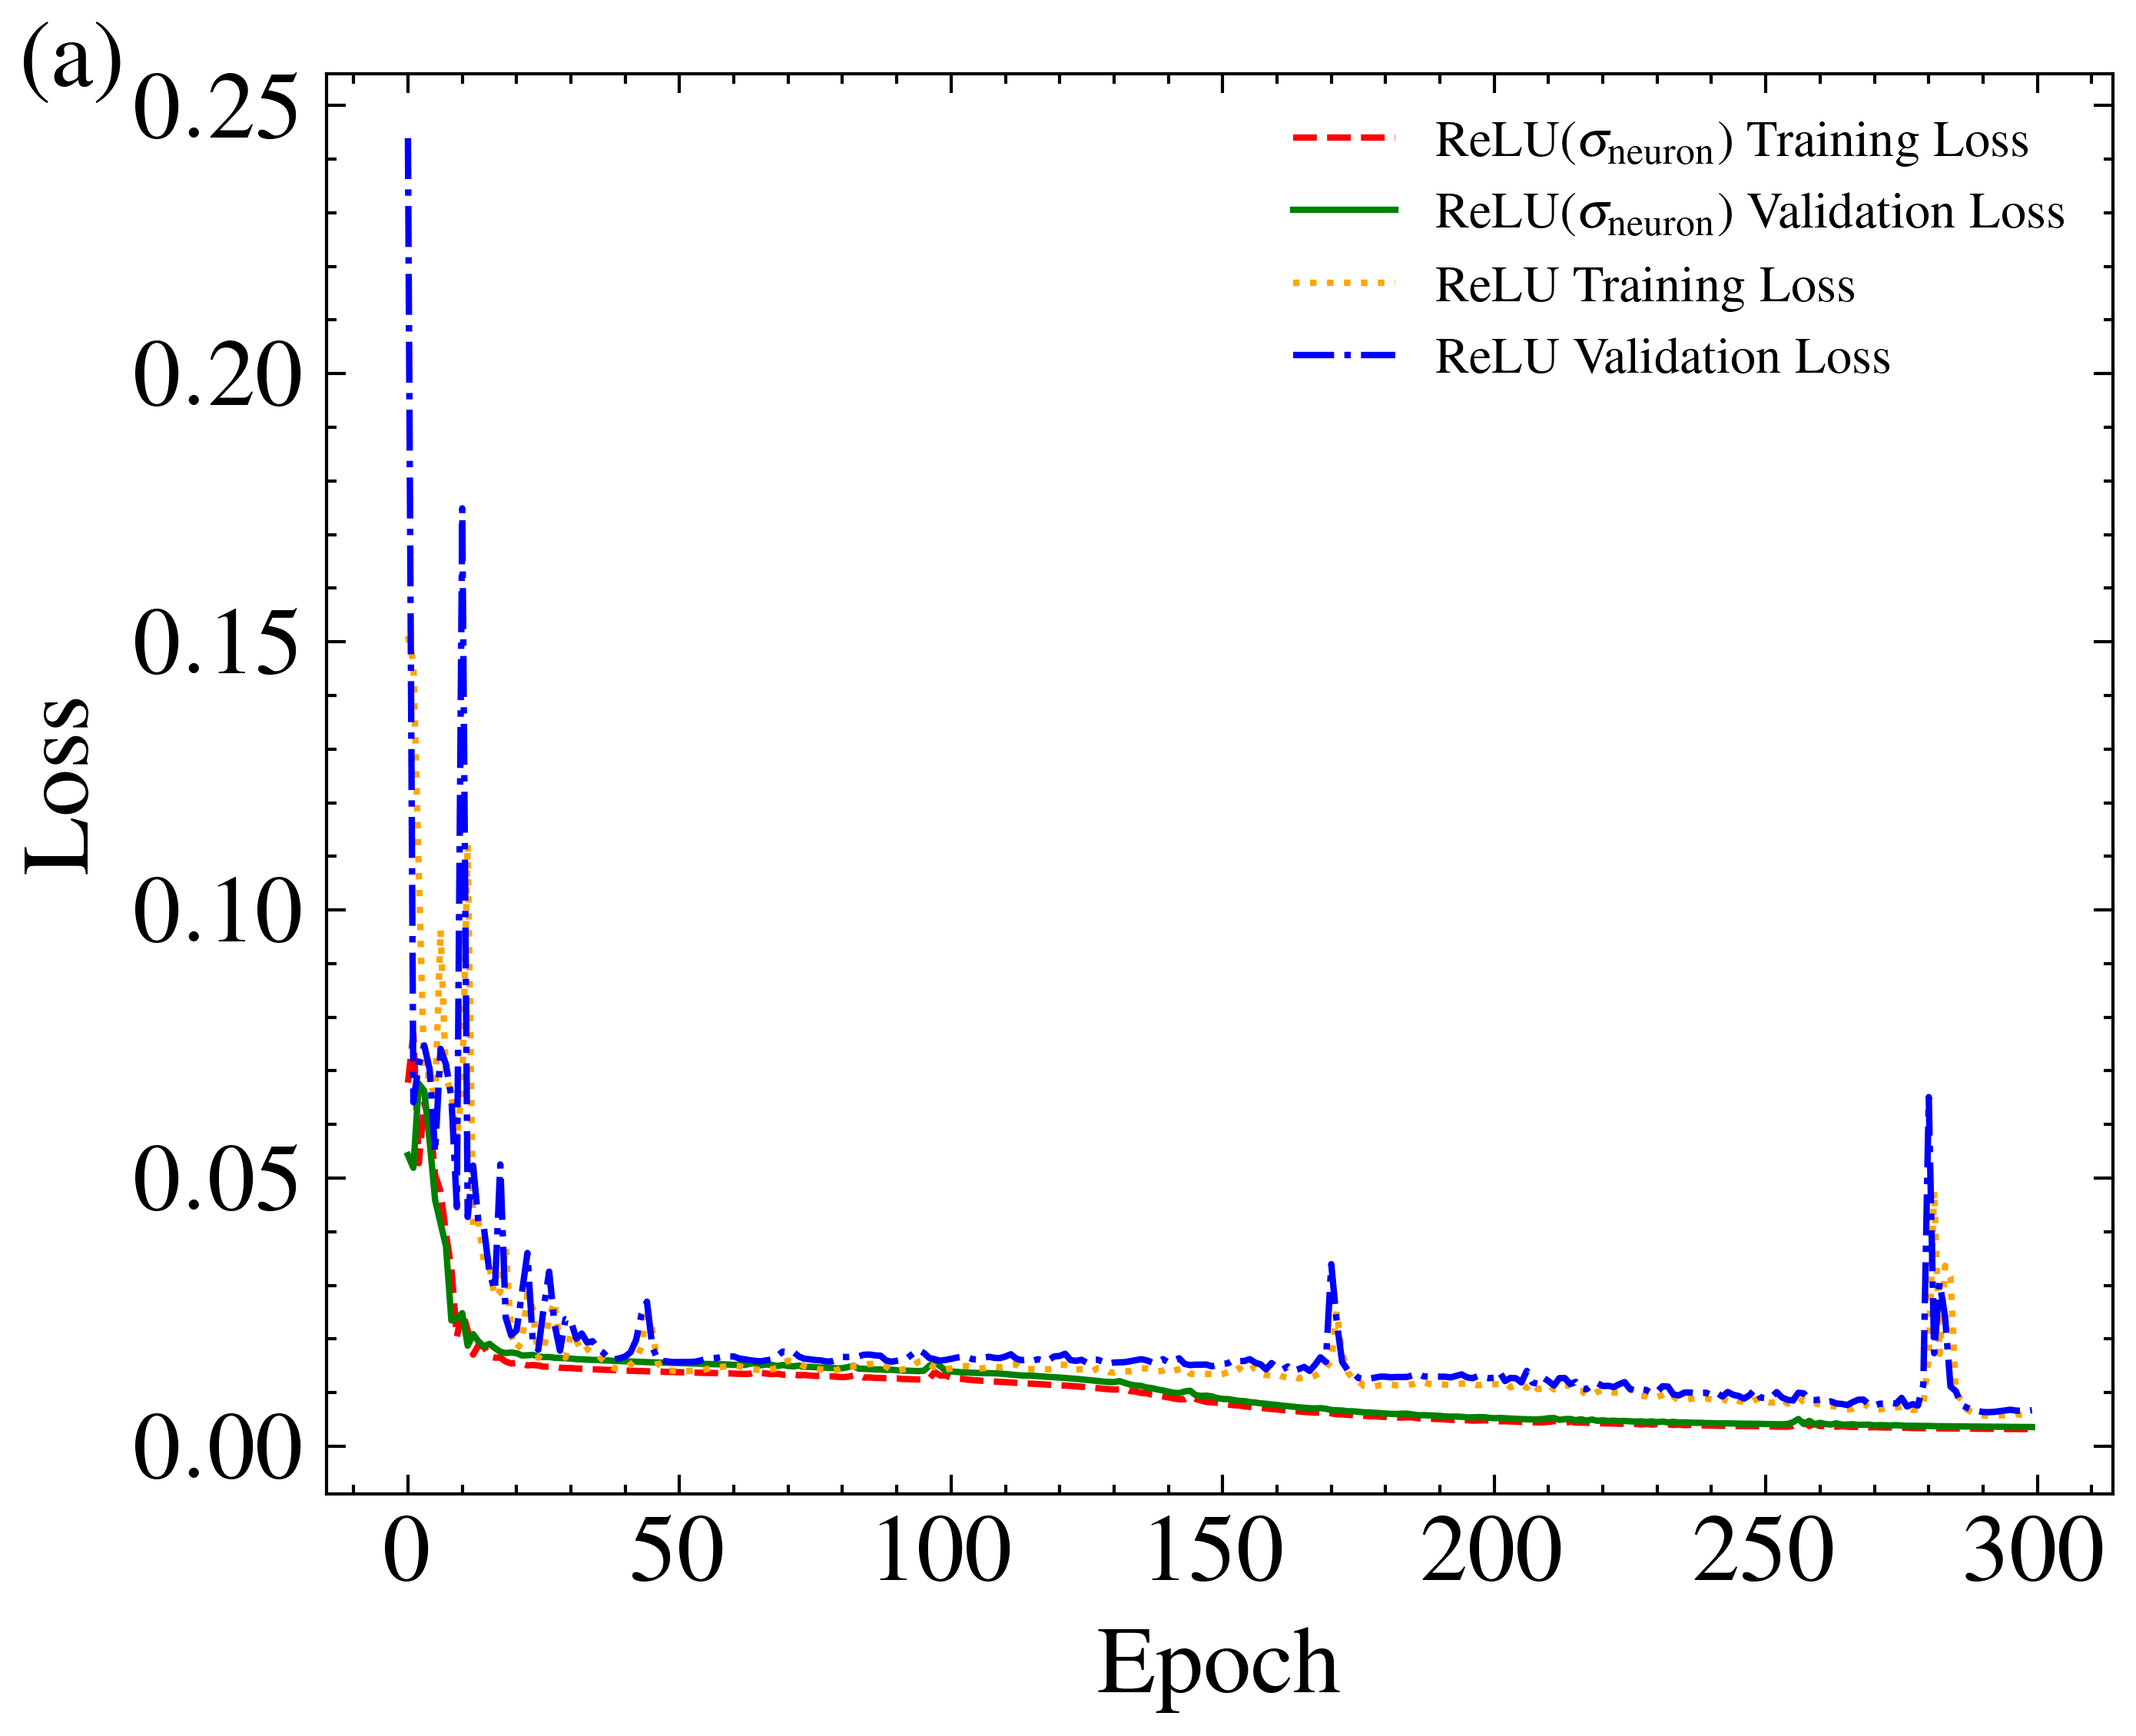

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

def load_loss_data(file_path):
    """加载指定路径的损失数据"""
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# 指定每种激活函数的损失数据路径
loss_files = {
    "ReLU($\\sigma_{\\mathrm{neuron}}$)": r"D:/PycharmProjects/保存的参数/指纹参数/loss_data(relu内嵌).pkl",
    "ReLU": r"D:/PycharmProjects/保存的参数/指纹参数/loss_data(relu).pkl"
}

# 加载损失数据
loss_data = {name: load_loss_data(path) for name, path in loss_files.items()}
print("损失数据已成功加载。")

# 设置全局绘图样式
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = True
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = True

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(5, 4))
plt.tick_params(labelsize=15)  # 设置刻度字体大小

# 颜色和线型配置
colors = ['red', 'green','orange', 'blue']
linestyles = ['--', '-', ':', '-.']  

# 为每种激活函数绘制训练和验证损失曲线
for i, (name, data) in enumerate(loss_data.items()):
    # 绘制 train_loss
    ax.plot(np.arange(len(data['train_loss'])), data['train_loss'], 
            color=colors[2 * i], linestyle=linestyles[2 * i], 
            label=f'{name} Training Loss', linewidth=1)

    # 绘制 valid_loss
    ax.plot(np.arange(len(data['valid_loss'])), data['valid_loss'], 
            color=colors[2 * i + 1], linestyle=linestyles[2 * i + 1], 
            label=f'{name} Validation Loss', linewidth=1)

# 设置轴标签
ax.set_xlabel(r'$\mathrm{Epoch}$', fontsize=15)
ax.set_ylabel(r'$\mathrm{Loss}$', fontsize=15)

# 手动设置x轴刻度
max_epochs = max(len(data['valid_loss']) for data in loss_data.values())
plt.xticks(np.arange(0, max_epochs + 5, step=50))

# 添加左上角的 (a) 标签
ax.text(-0.17, 0.99, '(a)', transform=ax.transAxes, 
        fontdict={'size': 15, 'color': 'black'})

# 添加图例
plt.legend(fontsize=8, loc='upper right')

# 指定保存路径和文件名
plot_path = r'D:/PycharmProjects/保存的参数/指纹参数/Fig8a.eps'

# 保存为 EPS 文件
plt.savefig(plot_path, format='eps', bbox_inches='tight')
print(f"验证损失图已保存到 {plot_path}")

# 展示验证损失图
plt.show()
